# Custom EDA script 

This notebook takes in a clean dataframe and performs exploratory data analysis steps 
#### Mainly for continuous data 

- Assumptions
  1. There are no missing values in the df
  2. The last of the df contains the target variable 
    
#### Task performed 
1. Extract basic info of the df (df.info)
2. Basic descriptive stats (mean, median, quartiles etc.)
3. Correlation table + heatmap
4. Top features vs. target variable correlation table 
5. Box plots to observe outliers 
6. Distribution plots to check skewness 
7. (sampled) Scatter plots of all features againt the target var. 
8. Basic regression analysis with statsmodels lib. 

BEWARE: When this script is run standalone (i.e. not called into another notebook), the DF is undefined. In which case it loads a library dataset from statsmodel and uses that to show the result.  

In [ ]:
# import relevent libraries 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels as sm
import time    # allows to pause 

from statsmodels import datasets
%matplotlib inline

In [ ]:
# This script is to be inside another notebook where DF has already been defined. If not, use a builtin df for observation
try:
    DF.info() 
except:     #load a df from the builtin lib. 
    Lib_dataset = sm.datasets.macrodata.load_pandas()
    DF = Lib_dataset.data

targetVarName = DF.columns[-1]

print('***The target variable is : ' + targetVarName)  #chekcing if it picked the right name

print(DF.describe()) 

In [ ]:
# see correlation between all variables in the form of heatmap + R values 
plt.figure(figsize=(12,8))
heat = sns.heatmap(DF.corr(), annot=True, fmt='.2g').set(title='Correlation plot')
print("Heatmap is : ")
plt.show()

## plotting heatmap of 5 largest correlated factors with the target variable

k = 6 
cols = DF.corr().nlargest(k, targetVarName)[targetVarName].index
cm = DF[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap = 'viridis').set(title='Top features correlated to Target')
plt.show()


['year' 'quarter' 'realgdp' 'realcons' 'realinv' 'realgovt' 'realdpi'
 'cpi' 'm1' 'tbilrate' 'unemp' 'pop' 'infl' 'realint']


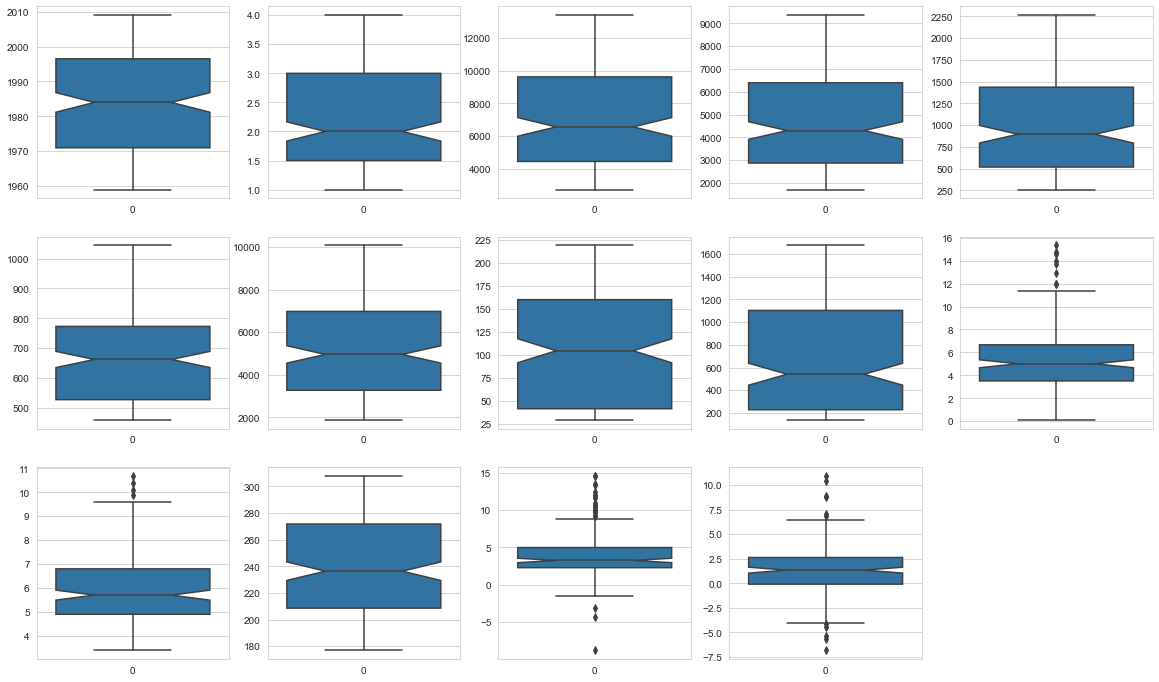

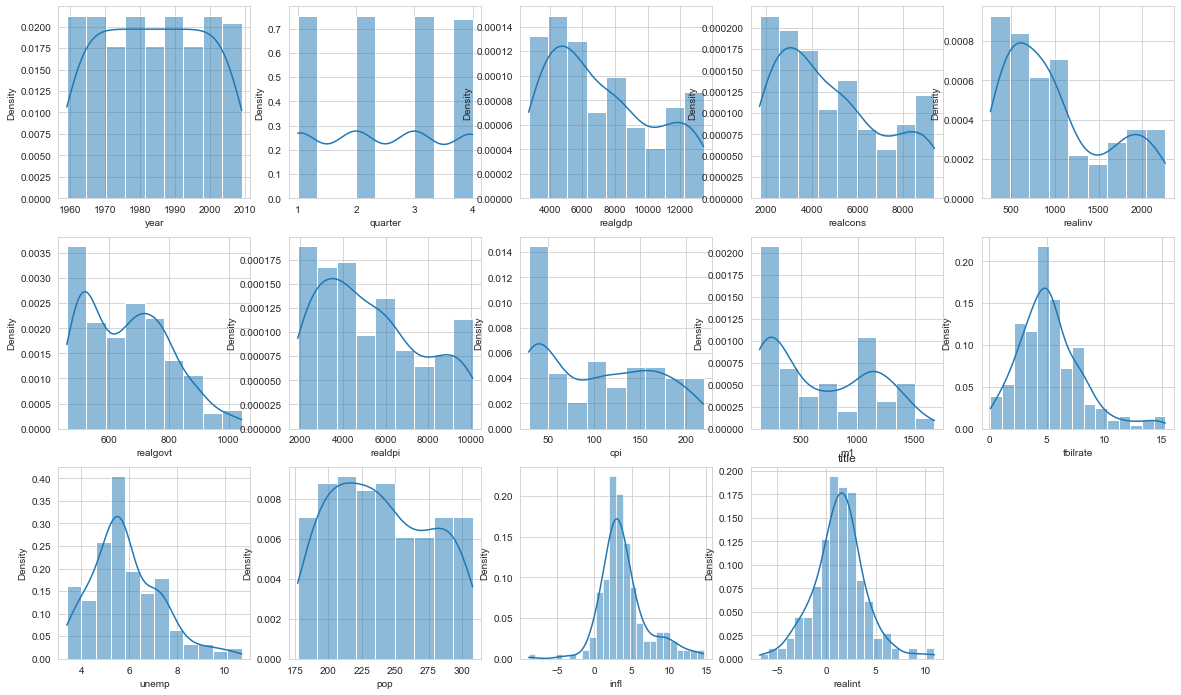

In [124]:
## Now try to see the outliers by plotting box plots and distributions 
import math 

dfCols = DF.columns.values
print(dfCols)

subCol = len(dfCols)  #no of columns in the subplot figure 
#no of rows will be automatically calculated, accomodating 5 vars per row 

plt.figure(figsize=(20,12))
for i in range(0,len(dfCols)):
    plt.subplot(math.ceil(subCol/5),5, i+1) 
    sns.boxplot(data = DF[dfCols[i]], notch = True)
    sns.set_style('whitegrid')
plt.show()


plt.figure(figsize=(20,12))

for j in range(0,len(dfCols)):
    plt.subplot(math.ceil(subCol/5),5, j+1)
    sns.histplot(data = DF[dfCols[j]], kde=True, stat='density') 
    sns.set_style('whitegrid')

plt.show()


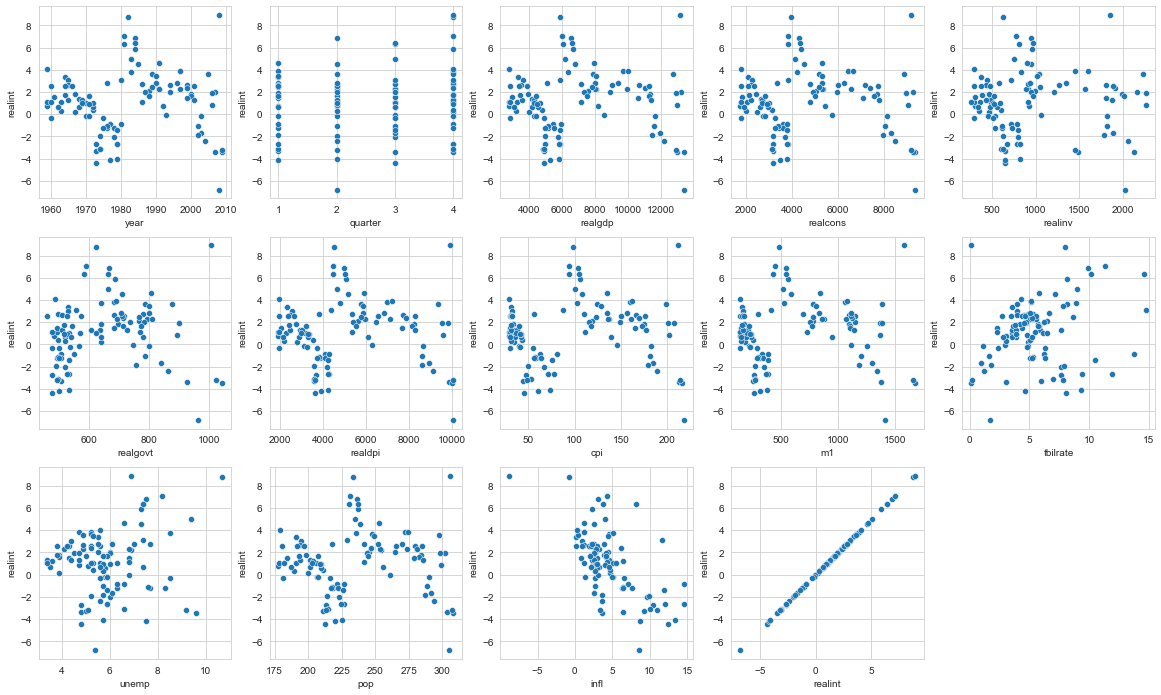

In [125]:
# It would be unwise to plot all data points if the size is too large. we will take a sample of the data 

sample_DF = DF.sample(frac=0.5, random_state = 10)
plt.figure(figsize=(20,12))

for i, feature in enumerate(dfCols):
    plt.subplot(math.ceil(subCol/5),5, i+1) 
    sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
plt.show()
